In [1]:
import pandas as pd
from utilidades_graficas import *

In [3]:
archivo_resultados = pd.read_excel('out.xlsx')
archivo_resultados.head()

,Unnamed: 0,platform,method,size,iterations,time,accuracy,dispersion
0,0,cuda,jacobi,500,6,0.196640,1.539881e-07,7.781079e-07
1,1,cuda,GD,500,14,0.455213,3.473436e-07,2.182765e-07
2,2,cuda,CG,500,7,0.221799,3.568614e-07,6.353823e-07
3,3,opencl,jacobi,500,6,0.015405,1.560348e-07,7.768503e-07
4,4,opencl,GD,500,14,0.051720,3.461279e-07,2.249581e-07


In [4]:
plataformas = archivo_resultados['platform'].unique()
metodos = archivo_resultados['method'].unique()
tamaños = archivo_resultados['size'].unique()
columnas = ['plataforma', 'metodo', 'tamaño', 'iteraciones_promedio', 'std_iteraciones',
            'tiempo_promedio', 'std_tiempo', 'precision_promedio', 'std_precision', 
            'dispersion_promedio', 'std_dispersion']
resultados = pd.DataFrame(columns=columnas)

for plataforma in plataformas:
    for metodo in metodos:
        for tamaño in tamaños:
            tabla = archivo_resultados.loc[archivo_resultados['platform'] == plataforma]
            tabla = tabla.loc[tabla['method'] == metodo]
            tabla = tabla.loc[tabla['size'] == tamaño]
            descripcion_iteraciones = describir(tabla['iterations'])
            descripcion_tiempo = describir(tabla['time'])
            descripcion_error = describir(tabla['accuracy'])
            descripcion_dispersion = describir(tabla['dispersion'])
            
            valores_fila = [[plataforma, metodo, tamaño] + descripcion_iteraciones +
                            descripcion_tiempo + descripcion_error + descripcion_dispersion]
            fila = pd.DataFrame(valores_fila, columns=columnas)
            resultados = resultados.append(fila, ignore_index=True)
            
resultados.head()

,plataforma,metodo,tamaño,iteraciones_promedio,std_iteraciones,tiempo_promedio,std_tiempo,precision_promedio,std_precision,dispersion_promedio,std_dispersion
0,cuda,jacobi,500,6.0,0.0,0.116109,0.028302,1.642160e-07,9.090752e-09,7.196163e-07,4.317934e-08
1,cuda,jacobi,1000,6.0,0.0,0.110057,0.001529,2.108490e-07,1.198811e-08,1.459284e-07,6.925322e-09
2,cuda,jacobi,1500,6.0,0.0,0.116138,0.000966,2.522349e-07,1.284499e-08,6.913932e-08,1.352512e-09
3,cuda,jacobi,2000,5.0,0.0,0.110658,0.000623,2.951766e-07,1.057025e-08,8.853602e-07,2.688638e-08
4,cuda,jacobi,2500,5.0,0.0,0.121369,0.005245,3.246011e-07,1.292612e-08,5.589373e-07,1.158918e-08


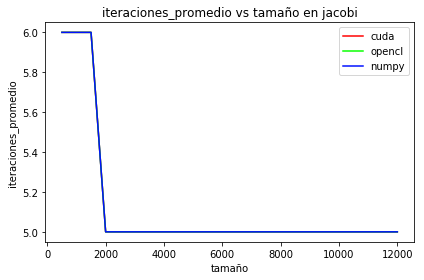

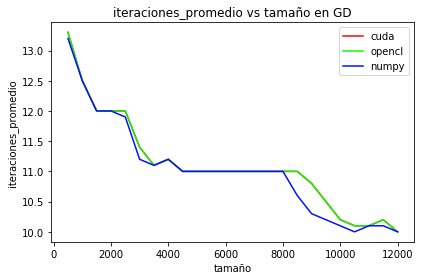

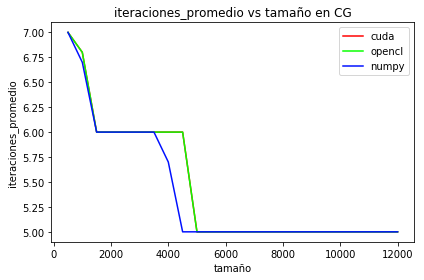

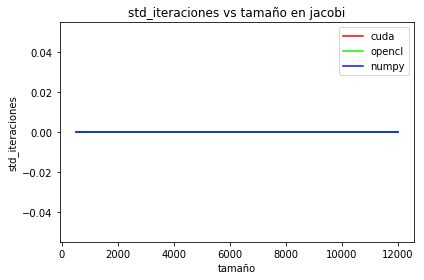

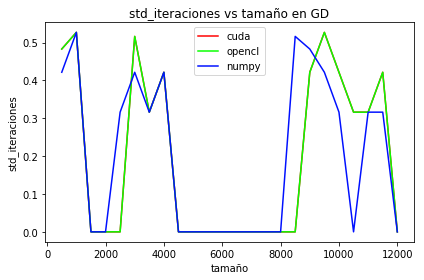

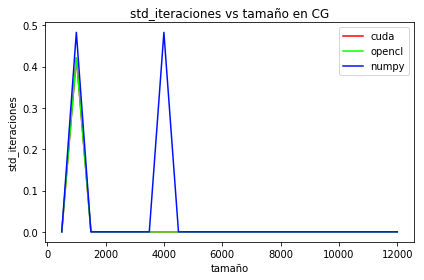

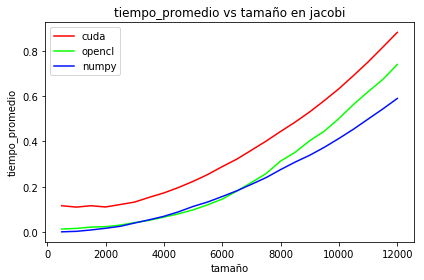

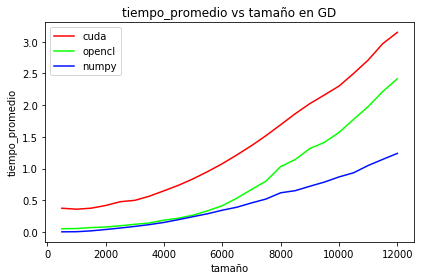

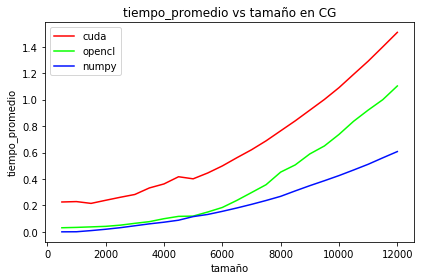

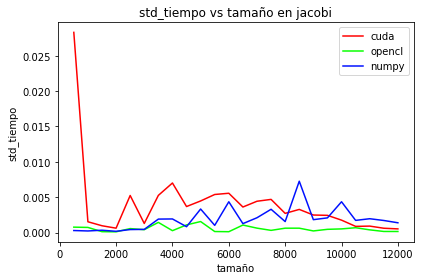

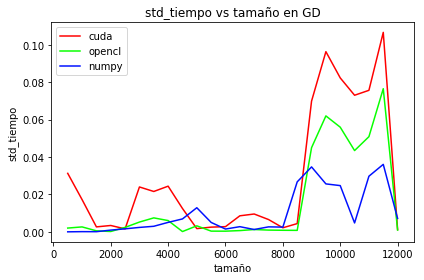

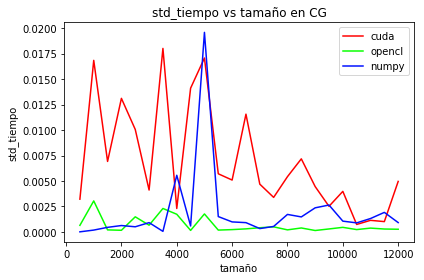

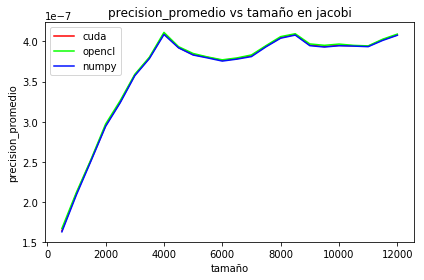

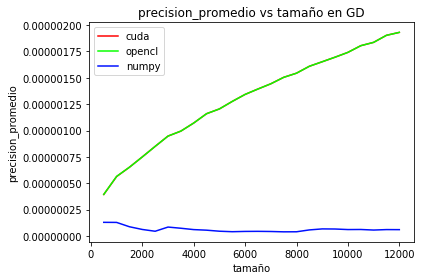

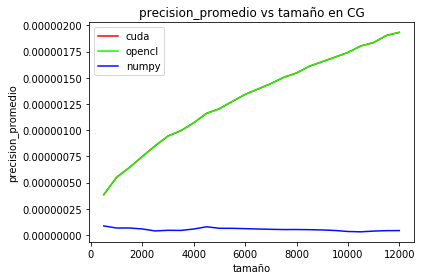

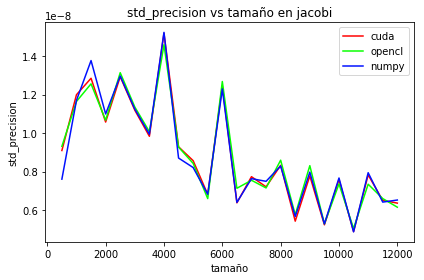

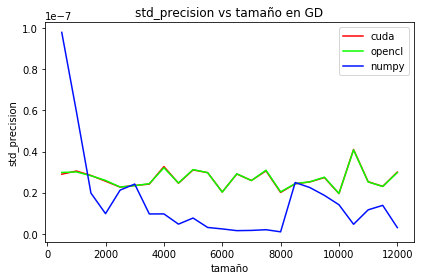

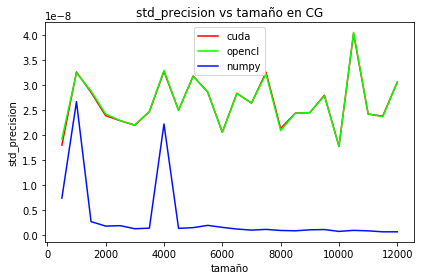

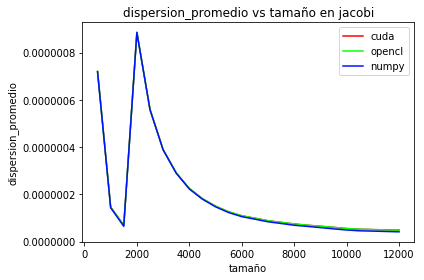

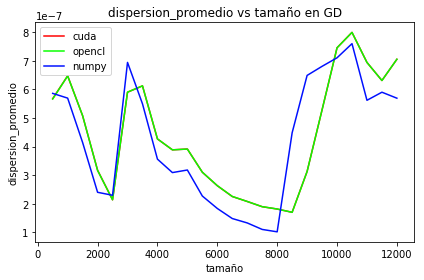

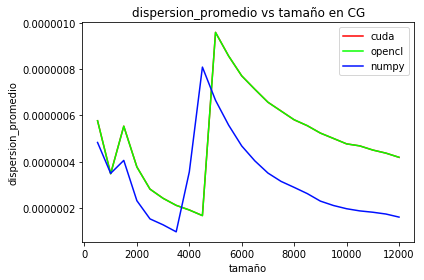

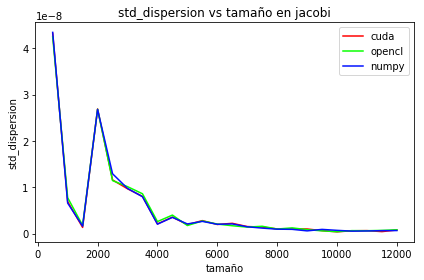

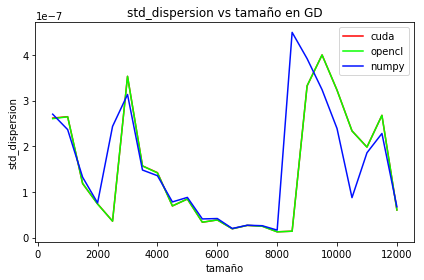

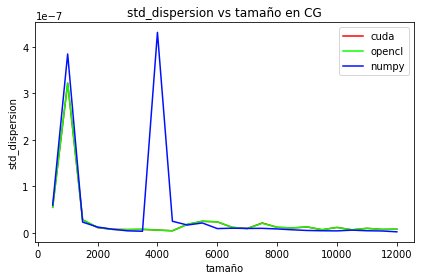

In [5]:
ys = columnas[3:]
for y in ys:
    for metodo in metodos:
        graficar(resultados, metodo=metodo, x='tamaño', y=y)